In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import mlflow
import mlflow.tensorflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Reading the dataset ForestFire
df = pd.read_csv('forestfires.csv')

In [3]:
# Checking the summary statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [4]:
# Checking the datatype of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
# Checking for missing values
print("Missing values :")
df.isnull().sum()

Missing values :


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
# Checking the first 10 rows of the dataset
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [7]:
# Finding the unique values of the Month column
df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [8]:
# Finding the unique values of the Day Column
df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [9]:
# Mapping and Encoding the features month and day to their corresponding values

month_order = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11,'dec':12}
day_order = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}

df['month'] = df['month'].map(month_order)
df['day'] = df['day'].map(day_order)

In [10]:
# Checking the data type fo the features again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


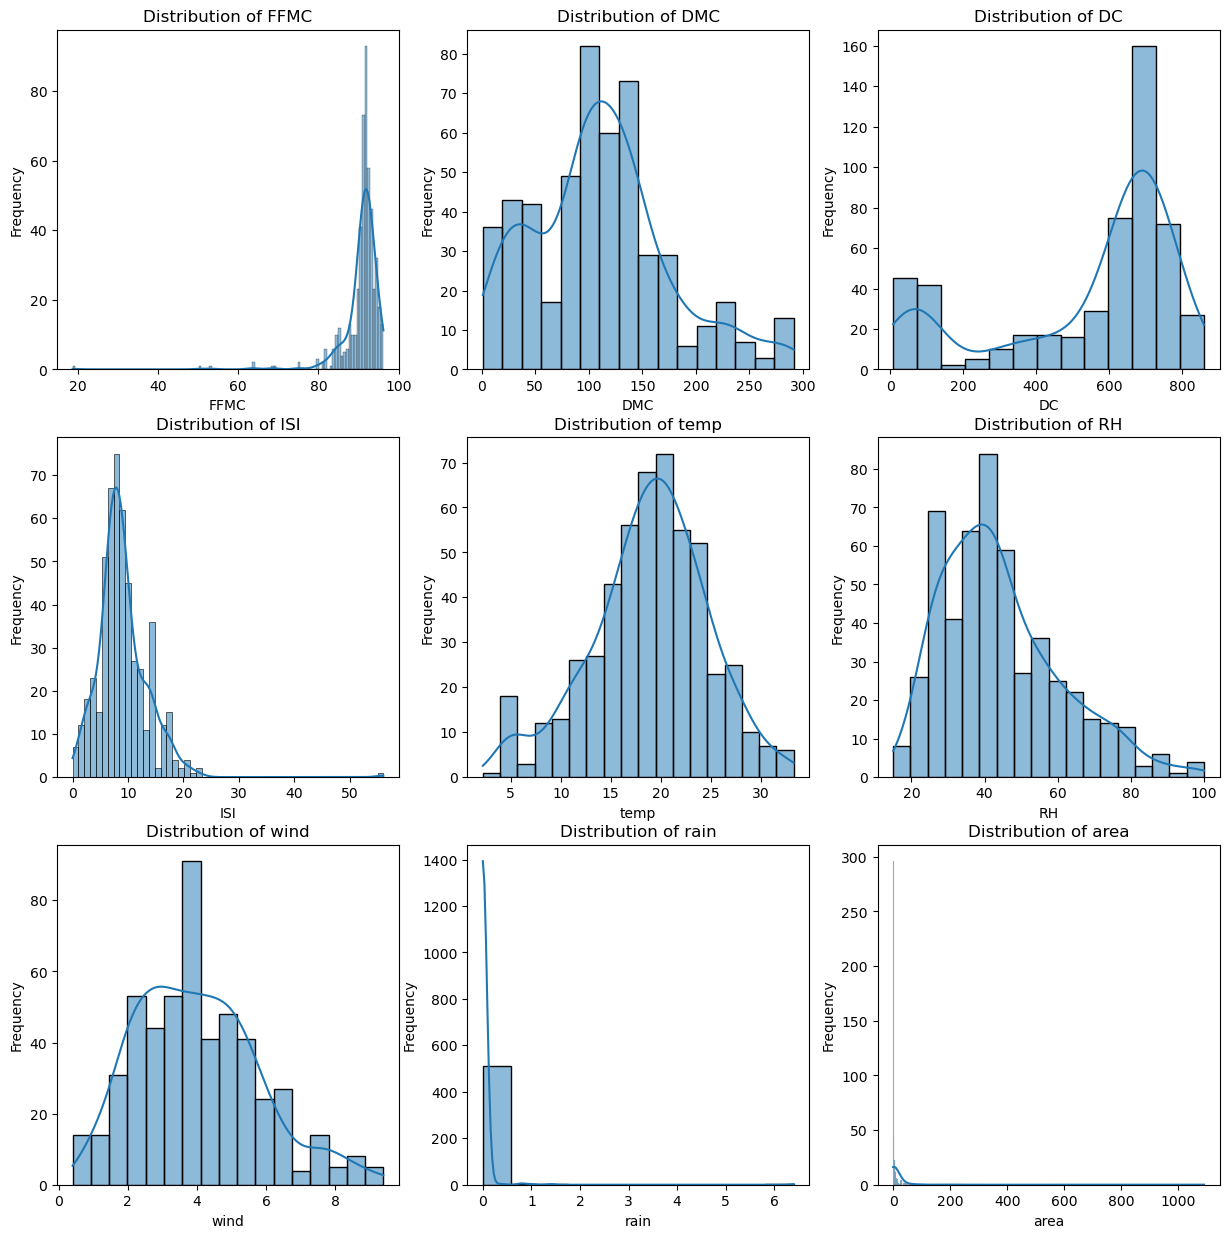

In [11]:
# Performing EDA on the relevant features

continuous_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()

for i,feature in enumerate(continuous_features):
  axes[i].set_title(f'Distribution of {feature}')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
  sns.histplot(df[feature], ax=axes[i], kde=True)

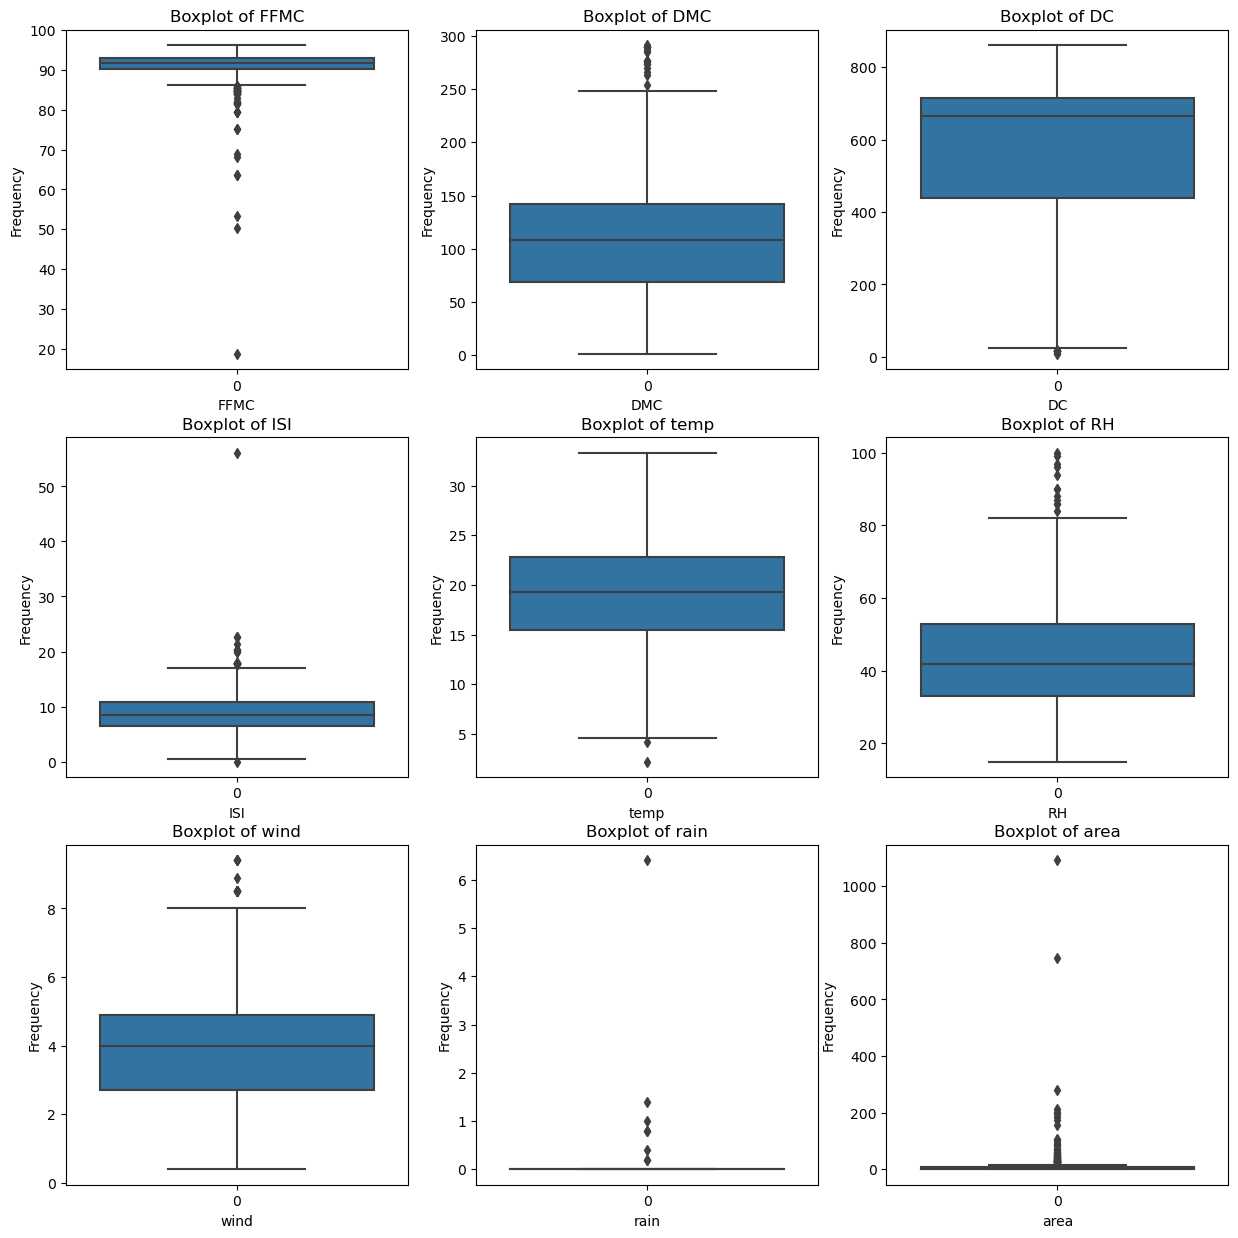

In [12]:
# Checking the boxplots of all relevant  features

fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()

for i,feature in enumerate(continuous_features):
  axes[i].set_title(f'Boxplot of {feature}')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
  sns.boxplot(df[feature], ax=axes[i])

/Users/aman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


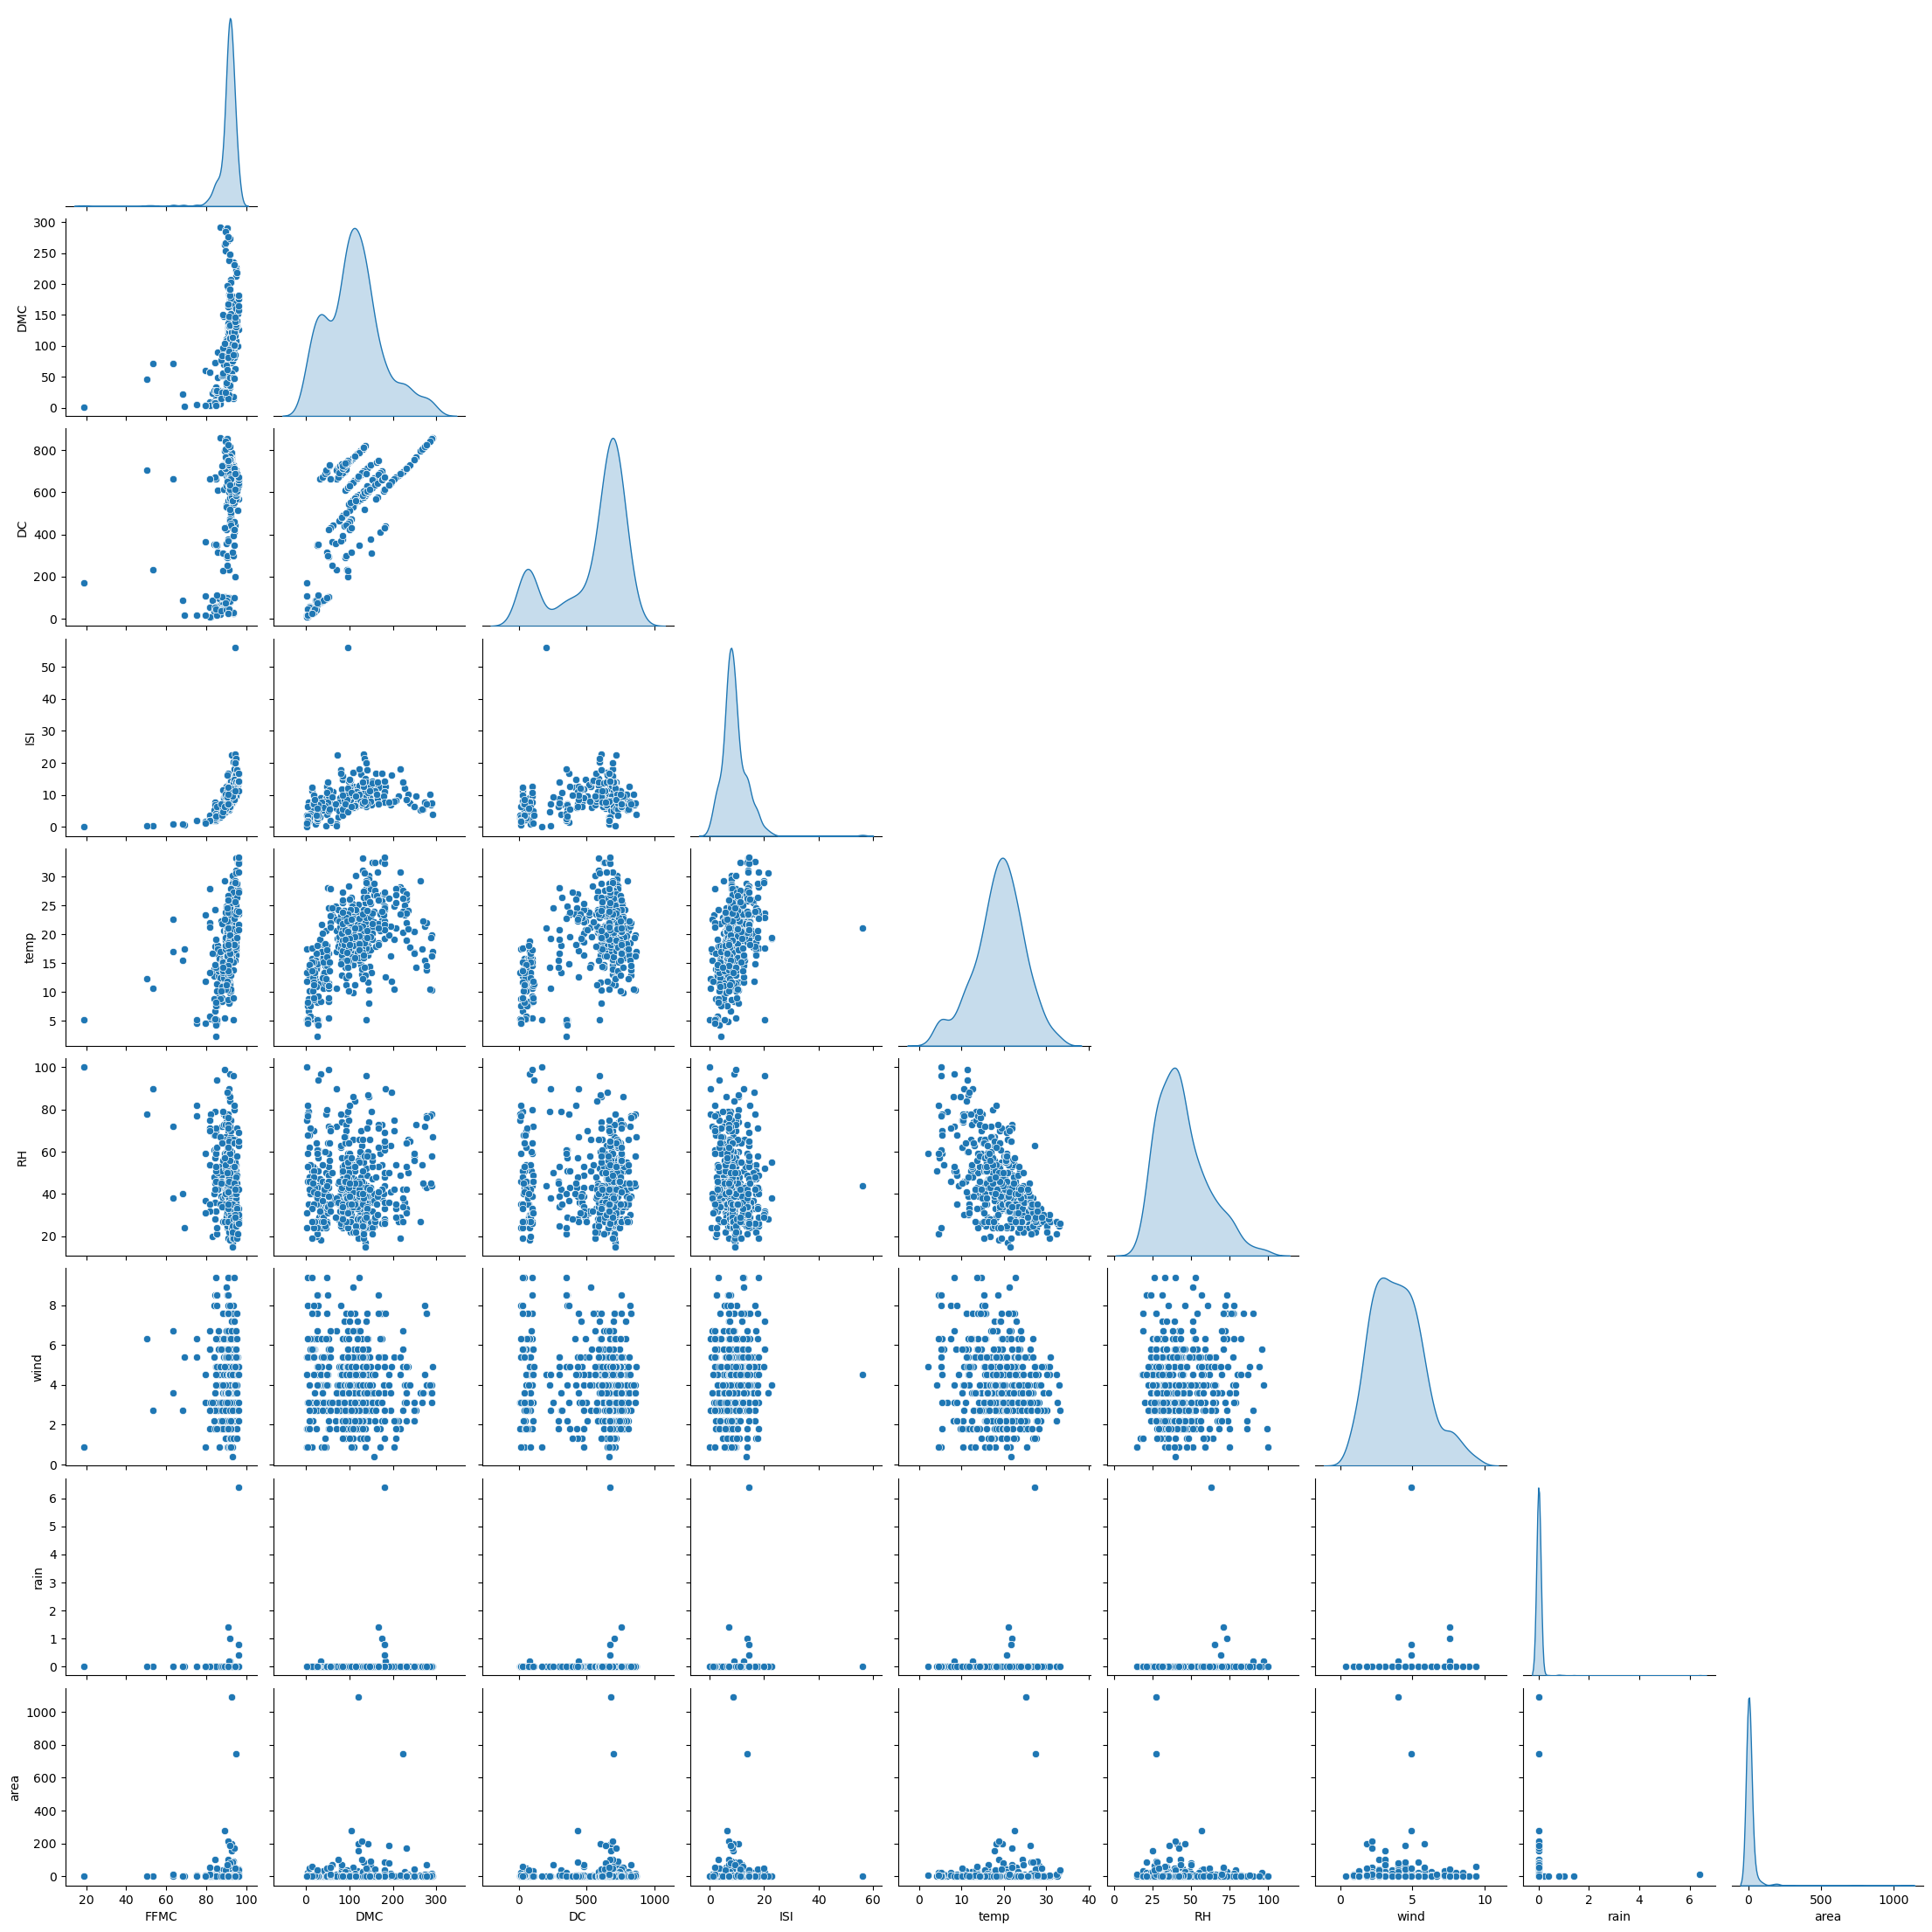

In [13]:
# Creating a pairplot of all relevant features
sns.pairplot(df[continuous_features], diag_kind='kde', corner=True);

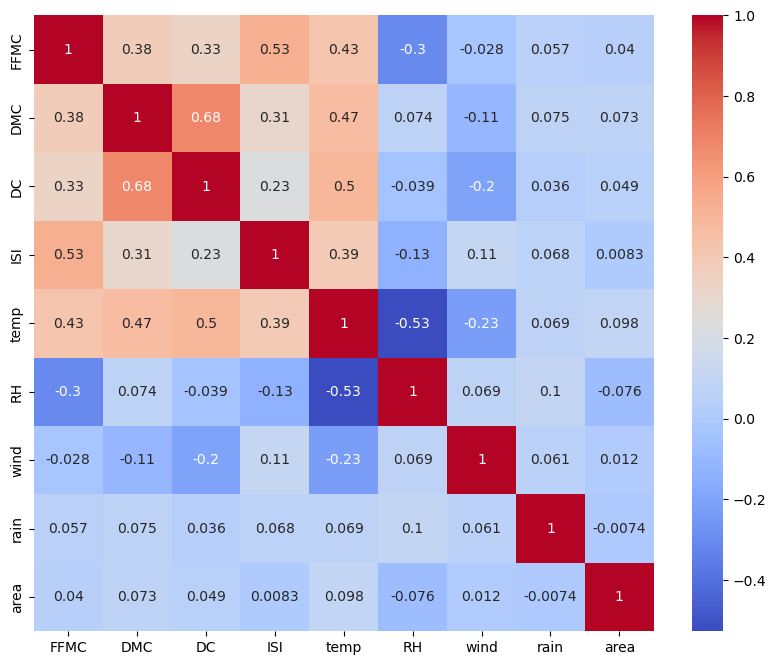

In [14]:
# Checking the heatmap for correlations

plt.figure(figsize=(10,8))
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='coolwarm');

**Insights from correlation**
- There is a strong correlation between DMC and DC (0.68), which are both related to dryness.
- There is a strong correlation between FFMC and ISI which means that high fine fuel moisture leads to increased fire spread.
 - There is a negative correlation with temperature and RH (Relative Humidity). As Temp increases, relative humidity decreases which matches with natural weather patterns.
 - Factors like wind and rain shows minimal effect on fire.

In [15]:
# Selecting the test and the target variables
X = df.drop('area', axis=1)
y = df['area']

In [16]:
# Scaling the numerical features by using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Applying Log transformation of the target variable area to address skewness
y = np.log1p(y)

In [18]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Defining the NN Model Architecture using tensorflow

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) # Single Output Layer
])

/Users/aman/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
# Compiling the model we created with dense layers
model.compile(optimizer='adam',loss='mse', metrics=['mae'])

In [21]:
# Setting the tracking server uri for logging
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [22]:
# Creating a new MLFlow Experiment 
mlflow.set_experiment('ml_experiment')

2024/12/20 15:33:45 INFO mlflow.tracking.fluent: Experiment with name 'ml_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/771237528700801244', creation_time=1734705225558, experiment_id='771237528700801244', last_update_time=1734705225558, lifecycle_stage='active', name='ml_experiment', tags={}>

In [42]:
# Ensure any previous run is ended
mlflow.end_run()

# Training the model and logging with MLFlow
mlflow.tensorflow.autolog()


with mlflow.start_run():
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2)
    
    # Making predictions on the test data
    y_pred = model.predict(X_test).flatten()
    y_pred = np.expm1(y_pred)  # Reverse log transformation
    y_pred = np.clip(y_pred, 0, None)  # Replace negative values with 0
    r2 = r2_score(y_test, y_pred)

    # Logging the r2 score metrics manually
    mlflow.log_metrics({"r2_score": r2,})


2024/12/20 15:42:52 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/100


11/11 - 0s - 7ms/step - loss: 0.0201 - mae: 0.0808 - val_loss: 2.8161 - val_mae: 1.2354
Epoch 2/100
11/11 - 0s - 2ms/step - loss: 0.0173 - mae: 0.0715 - val_loss: 2.8597 - val_mae: 1.2550
Epoch 3/100
11/11 - 0s - 2ms/step - loss: 0.0278 - mae: 0.0870 - val_loss: 2.8542 - val_mae: 1.2506
Epoch 4/100
11/11 - 0s - 2ms/step - loss: 0.0201 - mae: 0.0787 - val_loss: 2.8664 - val_mae: 1.2374
Epoch 5/100
11/11 - 0s - 2ms/step - loss: 0.0210 - mae: 0.0766 - val_loss: 2.8535 - val_mae: 1.2395
Epoch 6/100


11/11 - 0s - 4ms/step - loss: 0.0210 - mae: 0.0834 - val_loss: 2.7970 - val_mae: 1.2331
Epoch 7/100
11/11 - 0s - 2ms/step - loss: 0.0212 - mae: 0.0848 - val_loss: 2.8264 - val_mae: 1.2489
Epoch 8/100
11/11 - 0s - 2ms/step - loss: 0.0202 - mae: 0.0826 - val_loss: 2.8546 - val_mae: 1.2427
Epoch 9/100
11/11 - 0s - 2ms/step - loss: 0.0193 - mae: 0.0765 - val_loss: 2.9428 - val_mae: 1.2661
Epoch 10/100


11/11 - 0s - 5ms/step - loss: 0.0208 - mae: 0.0841 - val_loss: 2.7913 - val_mae: 1.2410
Epoch 11/100
11/11 - 0s - 5ms/step - loss: 0.0180 - mae: 0.0750 - val_loss: 2.8471 - val_mae: 1.2568
Epoch 12/100
11/11 - 0s - 2ms/step - loss: 0.0172 - mae: 0.0695 - val_loss: 2.9009 - val_mae: 1.2479
Epoch 13/100
11/11 - 0s - 2ms/step - loss: 0.0184 - mae: 0.0761 - val_loss: 2.8607 - val_mae: 1.2601
Epoch 14/100
11/11 - 0s - 2ms/step - loss: 0.0189 - mae: 0.0753 - val_loss: 2.8362 - val_mae: 1.2465
Epoch 15/100
11/11 - 0s - 2ms/step - loss: 0.0166 - mae: 0.0697 - val_loss: 2.8613 - val_mae: 1.2502
Epoch 16/100
11/11 - 0s - 2ms/step - loss: 0.0154 - mae: 0.0595 - val_loss: 2.8400 - val_mae: 1.2401
Epoch 17/100
11/11 - 0s - 2ms/step - loss: 0.0149 - mae: 0.0603 - val_loss: 2.8289 - val_mae: 1.2576
Epoch 18/100
11/11 - 0s - 2ms/step - loss: 0.0151 - mae: 0.0566 - val_loss: 2.8985 - val_mae: 1.2528
Epoch 19/100
11/11 - 0s - 2ms/step - loss: 0.0163 - mae: 0.0604 - val_loss: 2.8434 - val_mae: 1.2474
Epo

11/11 - 0s - 5ms/step - loss: 0.0244 - mae: 0.0981 - val_loss: 2.7822 - val_mae: 1.2376
Epoch 29/100
11/11 - 0s - 2ms/step - loss: 0.0191 - mae: 0.0806 - val_loss: 2.8047 - val_mae: 1.2416
Epoch 30/100
11/11 - 0s - 2ms/step - loss: 0.0174 - mae: 0.0735 - val_loss: 2.8755 - val_mae: 1.2572
Epoch 31/100
11/11 - 0s - 2ms/step - loss: 0.0168 - mae: 0.0642 - val_loss: 2.8393 - val_mae: 1.2525
Epoch 32/100
11/11 - 0s - 2ms/step - loss: 0.0168 - mae: 0.0659 - val_loss: 2.8339 - val_mae: 1.2425
Epoch 33/100
11/11 - 0s - 2ms/step - loss: 0.0205 - mae: 0.0774 - val_loss: 2.8985 - val_mae: 1.2570
Epoch 34/100
11/11 - 0s - 2ms/step - loss: 0.0176 - mae: 0.0700 - val_loss: 2.8038 - val_mae: 1.2420
Epoch 35/100
11/11 - 0s - 2ms/step - loss: 0.0187 - mae: 0.0784 - val_loss: 2.8349 - val_mae: 1.2505
Epoch 36/100
11/11 - 0s - 2ms/step - loss: 0.0180 - mae: 0.0670 - val_loss: 2.8755 - val_mae: 1.2614
Epoch 37/100
11/11 - 0s - 2ms/step - loss: 0.0163 - mae: 0.0641 - val_loss: 2.8683 - val_mae: 1.2439
Epo

11/11 - 0s - 7ms/step - loss: 0.0250 - mae: 0.0997 - val_loss: 2.7377 - val_mae: 1.2134
Epoch 48/100
11/11 - 0s - 2ms/step - loss: 0.0211 - mae: 0.0865 - val_loss: 2.8400 - val_mae: 1.2368
Epoch 49/100
11/11 - 0s - 2ms/step - loss: 0.0207 - mae: 0.0807 - val_loss: 2.8256 - val_mae: 1.2521
Epoch 50/100
11/11 - 0s - 2ms/step - loss: 0.0184 - mae: 0.0761 - val_loss: 2.8829 - val_mae: 1.2533
Epoch 51/100
11/11 - 0s - 2ms/step - loss: 0.0185 - mae: 0.0721 - val_loss: 2.8439 - val_mae: 1.2475
Epoch 52/100
11/11 - 0s - 2ms/step - loss: 0.0185 - mae: 0.0748 - val_loss: 2.7731 - val_mae: 1.2232
Epoch 53/100
11/11 - 0s - 2ms/step - loss: 0.0215 - mae: 0.0889 - val_loss: 2.7862 - val_mae: 1.2544
Epoch 54/100
11/11 - 0s - 2ms/step - loss: 0.0204 - mae: 0.0821 - val_loss: 2.8757 - val_mae: 1.2560
Epoch 55/100
11/11 - 0s - 2ms/step - loss: 0.0196 - mae: 0.0755 - val_loss: 2.8488 - val_mae: 1.2469
Epoch 56/100
11/11 - 0s - 2ms/step - loss: 0.0225 - mae: 0.0876 - val_loss: 2.8079 - val_mae: 1.2413
Epo

In [43]:
# Making Predictions on the new data

# Creating a DataFrame with the same column names as original X
new_data = pd.DataFrame(
    [[6, 5, 6, 5, 45, 85.3, 34, 20, 29, 29, 5.4, 0]], 
    columns=X.columns  # Using the same column names as the original data
)
new_data = scaler.transform(new_data)  
prediction = model.predict(new_data)
prediction = np.expm1(prediction)  # Reverse log transformation
prediction = np.clip(prediction, 0, None)  # Replace negative values with 0
print(f"Predicted burned area: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted burned area: [[2.5442116]]


In [45]:
# Saving the Model
model.save("forest_fire_model.keras")